In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

df = pd.read_csv("../data/classification_data_raw.csv")

#Select features
features = [
    'income', 
    "per_college_educated_x",
    'median_contract_rent'
]

# features = [
#     'income', 'per_college_educated_x', 'per_college_educated_y', 
#     'per_low_income', 'percent_nonwhite', 'region_nonwhite', 'gentrified_rent'
# ]

#Split train and test data
train_df = df[df['year'].between(2012, 2022)]
test_df = df[df['year'] == 2023]

X_train = train_df[features]
y_train = train_df['gentrified']
X_test = test_df[features]
y_test = test_df['gentrified']

#Scale them appropriately
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train the randomforest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = "balanced")
model.fit(X_train_scaled, y_train)

#Predict 2023 values
test_df['predicted_prob'] = model.predict_proba(X_test_scaled)[:, 1]
test_df['predicted_class'] = model.predict(X_test_scaled)

#Performance
print("Classification Report for 2023:")
print(classification_report(y_test, test_df['predicted_class']))
print(test_df[['zip_code', 'year', 'gentrified', 'predicted_class', 'predicted_prob']].head())

Classification Report for 2023:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     15837
        True       0.50      0.02      0.03       518

    accuracy                           0.97     16355
   macro avg       0.73      0.51      0.51     16355
weighted avg       0.95      0.97      0.95     16355

        zip_code  year  gentrified  predicted_class  predicted_prob
183055       602  2023       False            False            0.02
183056       603  2023       False            False            0.11
183057       610  2023       False            False            0.18
183058       631  2023       False            False            0.00
183059       662  2023       False            False            0.05


/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_29507/2176180666.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_prob'] = model.predict_proba(X_test_scaled)[:, 1]
/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_29507/2176180666.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_class'] = model.predict(X_test_scaled)


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

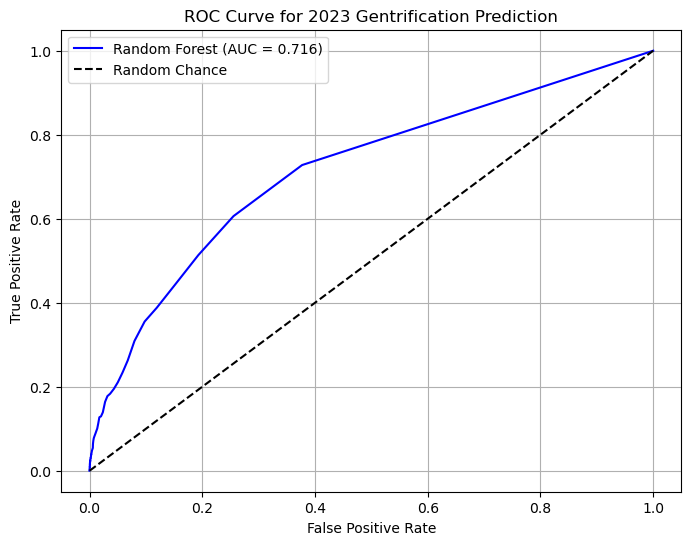

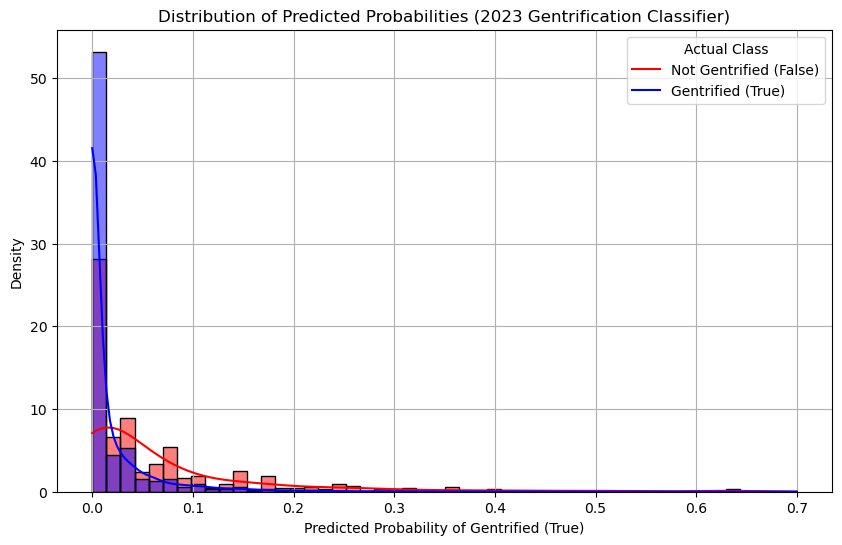

In [9]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_df['predicted_prob'])
auc_score = roc_auc_score(y_test, test_df['predicted_prob'])

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 2023 Gentrification Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution of predicted probabilities
df_probs = pd.DataFrame({
    'probability': test_df['predicted_prob'],
    'actual': y_test.values  # make sure this is aligned as an array
})

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_probs,
    x='probability',
    hue='actual',
    bins=50,
    kde=True,
    palette={0: 'blue', 1: 'red'},
    stat="density",
    common_norm=False
)
plt.title("Distribution of Predicted Probabilities (2023 Gentrification Classifier)")
plt.xlabel("Predicted Probability of Gentrified (True)")
plt.ylabel("Density")
plt.legend(title='Actual Class', labels=['Not Gentrified (False)', 'Gentrified (True)'])
plt.grid(True)
plt.show()



## Predict 2035 probability

In [10]:
df_2030 = pd.read_csv("../data/forecasted_data_2030.csv")

df_2030 = df_2030.rename(columns = {
    "income_2030": "income",
    "rent_2030": "median_contract_rent",
    "college_2030": "per_college_educated_x"
})

X_2030 = df_2030[features]

X_2030_scaled = scaler.transform(X_2030)

df_2030['predicted_prob'] = model.predict_proba(X_2030_scaled)[:, 1]
df_2030['predicted_class'] = model.predict(X_2030_scaled)

print("Gentrification predictions for 2030:")
print(df_2030[['zip_code', 'predicted_class', 'predicted_prob']].head())



Gentrification predictions for 2030:
   zip_code  predicted_class  predicted_prob
0       602            False            0.00
1       603            False            0.01
2       610            False            0.08
3       631            False            0.00
4       662            False            0.02


In [11]:
import joblib

joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']